# Data Cleaning of American Community Surveys

Our analysis pulls from 3 instances of the American Community Survey for Denver neighborhoods. These surveys are 5 year averages over the years 2006-2010, 2010-2014, and 2015-2019. These surveys contain a large number of features, in this notebook, we will isolate just the features that we care about. 

We are interested in understanding gentrification in Denver. We will consider only the following columns: 

**Race Information**
- PCT_HISPANIC (Percent Hispanic) 
- PCT_WHITE (Percent White) 
- PCT_BLACK (Percent Black)
- PCT_NATIVE_AM (Percent Native American)
- PCT_ASIAN (Percent Asian)
- PCT_HAWAIIAN_PI (Percent Hawaiian and Pacific Islander)
- PCT_OTHERRACE (Percent Other Race)
- PCT_TWOORMORE_RACES (Percent 2 or More Races)

**Education Information**
- TTLPOP_25PLUS_EDU (Total Population at least 25 years old used for education data)
- LESS_THAN_HS_DIPLOMA_EDU (Number of Residents with Less Than HS)
- HSGRAD_OR_EQUIV_EDU (Number of Residents with HS or HS equivelant)
- SOMECOLLEGE_OR_AA_EDU (Number of Residents with Some College or AA Degree)
- BACHELORS_OR_HIGHER_EDU (Number of Residents with a Bachelors or Higher)

**Income Information**
- PER_CAPITA_INCOME (Per Capita Income)
- AVG_HH_INCOME (Average Household Income)

**Poverty Information**
- PCT_IN_POVERTY (Percent in Poverty)
- PCT_FAM_POVERTY (Percent in Poverty)

In [5]:
# Load Packages
import numpy as np
import pandas as pd

In [6]:
# Load Data
ACS_2006 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Data_Cleaning/american_community_survey_nbrhd_2006_2010.csv")
ACS_2010 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Data_Cleaning/american_community_survey_nbrhd_2010_2014.csv")
ACS_2015 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Data_Cleaning/american_community_survey_nbrhd_2015_2019.csv")

In [7]:
# Columns to be used

neighborhood_col = ["NBHD_NAME"]
race_cols = ["PCT_HISPANIC", "PCT_WHITE", "PCT_BLACK", "PCT_NATIVE_AM", "PCT_ASIAN", "PCT_HAWAIIAN_PI", "PCT_OTHERRACE", "PCT_TWOORMORE_RACES"]
edu_cols = ["TTLPOP_25PLUS_EDU", "LESS_THAN_HS_DIPLOMA_EDU", "HSGRAD_OR_EQUIV_EDU", "SOMECOLLEGE_OR_AA_EDU", "BACHELORS_OR_HIGHER_EDU"]
income_cols = ["PER_CAPITA_INCOME", "AVG_HH_INCOME"]
poverty_cols = ["PCT_IN_POVERTY", "PCT_FAM_POVERTY"]

In [8]:
# Not all column names are consistent, fix this {'old' : 'NEW'}
ACS_2010 = ACS_2010.rename({"PCT_NATIVEAM":"PCT_NATIVE_AM", "PCT_HAWAIIANPI":"PCT_HAWAIIAN_PI", "PCT_POVERTY":"PCT_IN_POVERTY", "AVG_HH_INC":"AVG_HH_INCOME"}, axis = 1)
ACS_2015 = ACS_2015.rename({"PCT_NATIVEAM":"PCT_NATIVE_AM", "PCT_HAWAIIANPI":"PCT_HAWAIIAN_PI", "PCT_POVERTY":"PCT_IN_POVERTY"}, axis = 1)

In [9]:
# Get Neighborhood IDs and Left Join with Survey Data (Joined Later)
neighbor_id = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Data_Cleaning/statistical_neighborhoods.csv")

In [10]:
# Convert education data to percentage

# Add columns for ACS 2006
ACS_2006 = ACS_2006.assign(LESS_THAN_HS_PCT=100*ACS_2006['LESS_THAN_HS_DIPLOMA_EDU']/ACS_2006['TTLPOP_25PLUS_EDU'])
ACS_2006 = ACS_2006.assign(HS_GRAD_PCT=100*ACS_2006['HSGRAD_OR_EQUIV_EDU']/ACS_2006['TTLPOP_25PLUS_EDU'])
ACS_2006 = ACS_2006.assign(SOMECOLLEGE_PCT=100*ACS_2006['SOMECOLLEGE_OR_AA_EDU']/ACS_2006['TTLPOP_25PLUS_EDU'])
ACS_2006 = ACS_2006.assign(BACHELORS_PCT=100*ACS_2006['BACHELORS_OR_HIGHER_EDU']/ACS_2006['TTLPOP_25PLUS_EDU'])

# Add columns for ACS 2010
ACS_2010 = ACS_2010.assign(LESS_THAN_HS_PCT=100*ACS_2010['LESS_THAN_HS_DIPLOMA_EDU']/ACS_2010['TTLPOP_25PLUS_EDU'])
ACS_2010 = ACS_2010.assign(HS_GRAD_PCT=100*ACS_2010['HSGRAD_OR_EQUIV_EDU']/ACS_2010['TTLPOP_25PLUS_EDU'])
ACS_2010 = ACS_2010.assign(SOMECOLLEGE_PCT=100*ACS_2010['SOMECOLLEGE_OR_AA_EDU']/ACS_2010['TTLPOP_25PLUS_EDU'])
ACS_2010 = ACS_2010.assign(BACHELORS_PCT=100*ACS_2010['BACHELORS_OR_HIGHER_EDU']/ACS_2010['TTLPOP_25PLUS_EDU'])

# Add columns for ACS 2015
ACS_2015 = ACS_2015.assign(LESS_THAN_HS_PCT=100*ACS_2015['LESS_THAN_HS_DIPLOMA_EDU']/ACS_2015['TTLPOP_25PLUS_EDU'])
ACS_2015 = ACS_2015.assign(HS_GRAD_PCT=100*ACS_2015['HSGRAD_OR_EQUIV_EDU']/ACS_2015['TTLPOP_25PLUS_EDU'])
ACS_2015 = ACS_2015.assign(SOMECOLLEGE_PCT=100*ACS_2015['SOMECOLLEGE_OR_AA_EDU']/ACS_2015['TTLPOP_25PLUS_EDU'])
ACS_2015 = ACS_2015.assign(BACHELORS_PCT=100*ACS_2015['BACHELORS_OR_HIGHER_EDU']/ACS_2015['TTLPOP_25PLUS_EDU'])

In [11]:
# Select subset of data with columns to cluster on

edu_pct_cols = ["LESS_THAN_HS_PCT", "HS_GRAD_PCT", "SOMECOLLEGE_PCT", "BACHELORS_PCT"]
clustering_cols = race_cols + edu_pct_cols + income_cols + poverty_cols

ACS_2006_clustering = ACS_2006[clustering_cols]
ACS_2010_clustering = ACS_2010[clustering_cols]
ACS_2015_clustering = ACS_2015[clustering_cols]

# Clustering Neighborhoods

In this section, we cluster neighborhoods to find different groups of neighborhoods sorted by wealth/privilege. Note: measure of gentrification isn't quite the right word to use here, gentrification is the process of making a neighborhood wealthier/whiter etc, some neighborhoods do not go through this process, for example Country Club has been rich and white for many, many years.

We will use Sci-Kit Learn to implenment K-Means clustering. First, we build a pipeline with a StandardScaler object and a KMeans object. The StandardScaler scales our data to have mean zero and variance 1, this will improve the performance of KMeans by not allowing one large variable to dominate how we cluster while ignoring smaller variables.

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
from matplotlib.pyplot import figure
import random

First, we run a heirarchical clustering routine on our data to determine an optimal number of clusters to consider.

Text(0, 0.5, 'Euclidean distance')

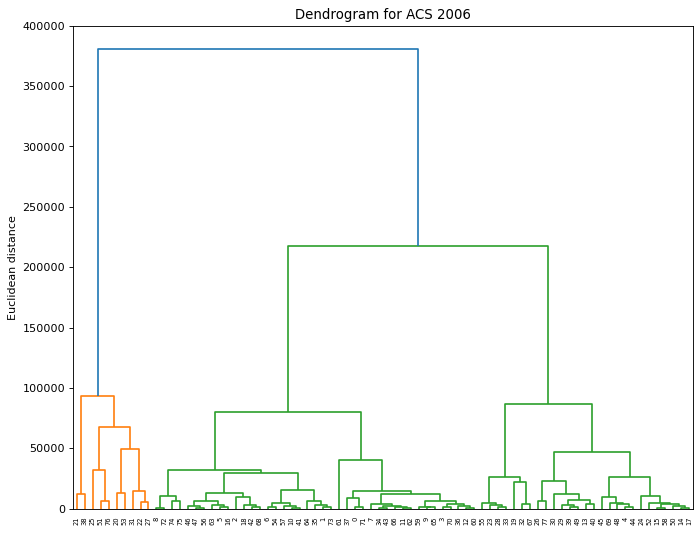

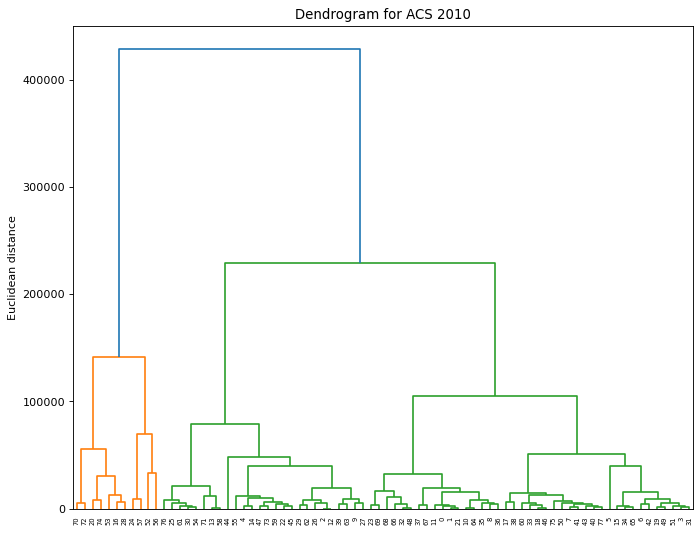

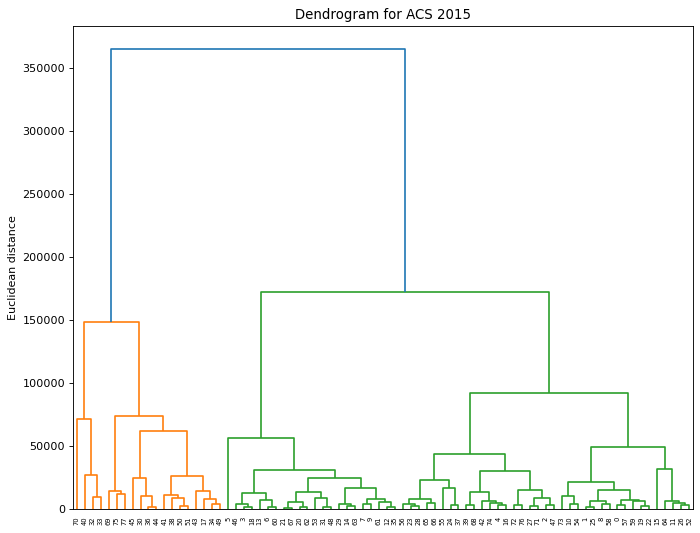

In [12]:
# Heirarchical Clustering

# Setting up how clustering will work
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

Z_06 = linkage(ACS_2006_clustering, method = 'ward')
Z_10 = linkage(ACS_2010_clustering, method = 'ward')
Z_15 = linkage(ACS_2015_clustering, method = 'ward')
 
# Plotting dendrogram
figure(figsize=(10, 8), dpi=80)
dendro = dendrogram(Z_06)
plt.title('Dendrogram for ACS 2006')
plt.ylabel('Euclidean distance')
# plt.savefig("2006 Dendo.png")
# plt.show()

figure(figsize=(10, 8), dpi=80)
dendro = dendrogram(Z_10)
plt.title('Dendrogram for ACS 2010')
plt.ylabel('Euclidean distance')
# plt.savefig("2010 Dendo.png")
# plt.show()

figure(figsize=(10, 8), dpi=80)
dendro = dendrogram(Z_15)
plt.title('Dendrogram for ACS 2015')
plt.ylabel('Euclidean distance')
# plt.savefig("2015 Dendo.png")
# plt.show()

In [13]:
random.seed(1)
# Set number of clusters
K = 3

# KMeans with Scaling

# Create scaler: scaler
scaler_2006 = StandardScaler()
scaler_2010 = StandardScaler()
scaler_2015 = StandardScaler()

kmeans_2006 = KMeans(n_clusters=K)
pipeline_2006 = make_pipeline(scaler_2006, kmeans_2006)
pipeline_2006.fit(ACS_2006_clustering)

kmeans_2010 = KMeans(n_clusters=K, init = kmeans_2006.cluster_centers_)
pipeline_2010 = make_pipeline(scaler_2010, kmeans_2010)
pipeline_2010.fit(ACS_2010_clustering)

kmeans_2015 = KMeans(n_clusters=K, init = kmeans_2010.cluster_centers_)
pipeline_2015 = make_pipeline(scaler_2015, kmeans_2015)
pipeline_2015.fit(ACS_2015_clustering)

# Calculate the cluster labels: labels
labels_2006 = pipeline_2006.predict(ACS_2006_clustering)
labels_2010 = pipeline_2010.predict(ACS_2010_clustering)
labels_2015 = pipeline_2015.predict(ACS_2015_clustering)

C:\Users\17347\Documents\Anaconda\lib\site-packages\sklearn\pipeline.py:335: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\17347\Documents\Anaconda\lib\site-packages\sklearn\pipeline.py:335: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [22]:
#Output labels for 2006

labels_2006

array([1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0], dtype=int32)

In [17]:
#Output labels for 2010

labels_2010

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2], dtype=int32)

In [18]:
#Output labels for 2015

labels_2015

array([2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [48]:
inv2006 = scaler_2006.inverse_transform(kmeans_2006.cluster_centers_)
centers2006 = pd.DataFrame(inv2006, columns = clustering_cols) 

inv2010 = scaler_2010.inverse_transform(kmeans_2010.cluster_centers_)
centers2010 = pd.DataFrame(inv2010, columns = clustering_cols) 

inv2015 = scaler_2015.inverse_transform(kmeans_2015.cluster_centers_)
centers2015 = pd.DataFrame(inv2015, columns = clustering_cols) 

centers2006

,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,PCT_NATIVE_AM,PCT_ASIAN,PCT_HAWAIIAN_PI,PCT_OTHERRACE,PCT_TWOORMORE_RACES,LESS_THAN_HS_PCT,HS_GRAD_PCT,SOMECOLLEGE_PCT,BACHELORS_PCT,PER_CAPITA_INCOME,AVG_HH_INCOME,PCT_IN_POVERTY,PCT_FAM_POVERTY
0,11.055833,78.046389,4.544444,0.531111,3.383611,0.066667,0.149444,2.220556,4.735078,12.538837,21.987764,60.738321,48492.000000,94605.222222,11.746944,5.394722
1,29.583636,44.594545,19.390455,0.673182,3.563182,0.065455,0.318182,1.812727,15.814143,25.200528,27.577753,31.407576,24140.363636,54256.045455,22.110455,18.496364
2,67.062000,22.519500,5.959000,0.812000,1.986500,0.005500,0.554000,1.099000,37.725619,29.798096,18.458814,14.017471,15354.400000,42629.700000,32.739000,29.606500


In [49]:
centers2010

,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,PCT_NATIVE_AM,PCT_ASIAN,PCT_HAWAIIAN_PI,PCT_OTHERRACE,PCT_TWOORMORE_RACES,LESS_THAN_HS_PCT,HS_GRAD_PCT,SOMECOLLEGE_PCT,BACHELORS_PCT,PER_CAPITA_INCOME,AVG_HH_INCOME,PCT_IN_POVERTY,PCT_FAM_POVERTY
0,9.581250,81.035000,3.822500,0.420937,2.961875,0.030938,0.164062,1.984062,3.983047,9.098949,19.735473,67.182531,56460.763437,109708.055938,11.174375,5.233125
1,22.783333,52.469583,15.860833,0.791667,4.514583,0.157917,0.282083,3.141667,10.701917,21.362370,28.788068,39.147646,29024.060833,66657.878333,17.397917,13.557083
2,62.086818,25.780000,6.240000,0.824091,2.678636,0.045455,0.126364,1.570909,35.937124,26.372100,20.796375,16.894401,18116.699091,48016.470909,31.290909,27.189545


In [50]:
centers2015

,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,PCT_NATIVE_AM,PCT_ASIAN,PCT_HAWAIIAN_PI,PCT_OTHERRACE,PCT_TWOORMORE_RACES,LESS_THAN_HS_PCT,HS_GRAD_PCT,SOMECOLLEGE_PCT,BACHELORS_PCT,PER_CAPITA_INCOME,AVG_HH_INCOME,PCT_IN_POVERTY,PCT_FAM_POVERTY
0,11.705685,78.651611,3.243882,0.383478,3.300593,0.092189,0.110589,2.509001,3.410698,8.217870,17.330271,71.041161,67782.147059,98492.676471,8.778431,4.073544
1,22.867441,55.596004,13.839610,0.322750,3.528666,0.206101,0.230866,3.408563,9.876060,17.838337,28.164115,44.121487,36732.500000,67718.708333,11.287500,7.715160
2,61.021605,26.460334,7.558317,0.740101,2.592038,0.082827,0.161992,1.382788,29.387968,27.702101,20.106320,22.803612,23861.600000,50616.150000,23.141012,19.975772


# Visualizing Neighborhoods

In this section, we plot the clustered neighborhoods for each data set. We will do so by using Geopandas with Matplotlib. The plot for Denver can be found on the city's data website.

In [14]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import geopandas as gpd

ModuleNotFoundError: No module named 'shapefile'

In [15]:
# Make copies of neighborhood data

neighborhoods_2006 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/Data_Cleaning/statistical_neighborhoods.csv")
neighborhoods_2010 = neighborhoods_2006.copy()
neighborhoods_2015 = neighborhoods_2006.copy()

In [16]:
# Create data frames containing just neighborhood name and cluster assignment. Other features are irrelevant for 
# plotting purposes

ACS_2006_labeled = ACS_2006.assign(CLUSTER=labels_2006)
neighborhood_clustered_2006 = ACS_2006_labeled[["NBHD_NAME", "CLUSTER"]]

ACS_2010_labeled = ACS_2010.assign(CLUSTER=labels_2010)
neighborhood_clustered_2010 = ACS_2010_labeled[["NBHD_NAME", "CLUSTER"]]

ACS_2015_labeled = ACS_2015.assign(CLUSTER=labels_2015)
neighborhood_clustered_2015 = ACS_2015_labeled[["NBHD_NAME", "CLUSTER"]]

In [17]:
# Not all neighborhood names are consistent, we fix this here

neighborhood_clustered_2010 = neighborhood_clustered_2010.replace({"College View - South Platte":"College View / South Platte", 
                                    "Gateway - Green Valley Ranch":"Gateway / Green Valley Ranch"})
neighborhood_clustered_2015 = neighborhood_clustered_2015.replace({"College View - South Platte":"College View / South Platte", 
                                    "Gateway - Green Valley Ranch":"Gateway / Green Valley Ranch",
                                    "Central Park":"Stapleton"})

In [18]:
# Use a left inner join to combine statistical neighborhoods with the cluster assignments, join on neighborhood name

plot_neighborhoods_2006 = neighborhoods_2006.merge(neighborhood_clustered_2006, how='inner', on="NBHD_NAME")
plot_neighborhoods_2010 = neighborhoods_2010.merge(neighborhood_clustered_2010, how='inner', on="NBHD_NAME")
plot_neighborhoods_2015 = neighborhoods_2015.merge(neighborhood_clustered_2015, how='inner', on="NBHD_NAME")

In [30]:
# Use geopandas to read the shapefile

filepath = "statistical_neighborhoods.shx"
map_df = gpd.read_file(filepath)

In [31]:
# Use a left join to combine clustering info with the shape file

shape_2006 = map_df.merge(plot_neighborhoods_2006, #map_df merge to df
 left_on=["NBHD_ID"], 
 right_on=["NBHD_ID"])

shape_2010 = map_df.merge(plot_neighborhoods_2010, #map_df merge to df
 left_on=["NBHD_ID"], 
 right_on=["NBHD_ID"])

shape_2015 = map_df.merge(plot_neighborhoods_2015, #map_df merge to df
 left_on=["NBHD_ID"], 
 right_on=["NBHD_ID"])

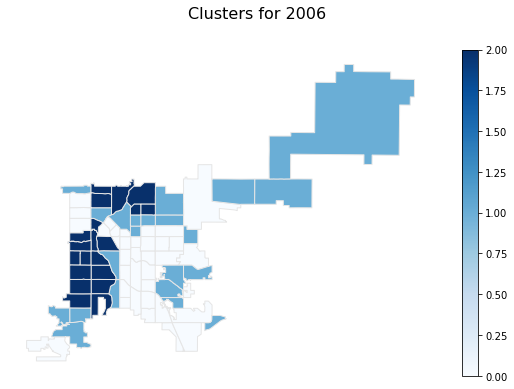

In [32]:
# Plot the clusters for 2006

fig, ax = plt.subplots(1, figsize=(10,6))
shape_2006.plot(column='CLUSTER', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
fig.suptitle('Clusters for 2006', fontsize=16)
plt.savefig("2006 Clusters.png")

(-105.1354863835069,
 -104.57406170048068,
 39.599318055711144,
 39.929171824075006)

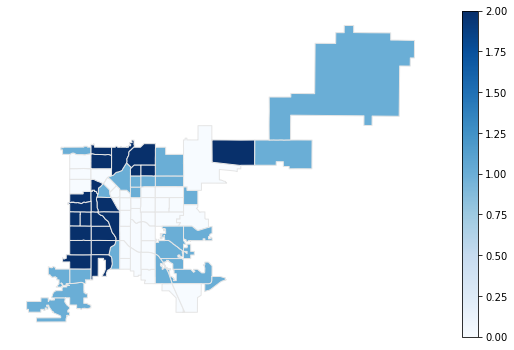

In [40]:
# Plot the clusters for 2010

fig, ax = plt.subplots(1, figsize=(10,6))
shape_2010.plot(column='CLUSTER', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

(-105.1354863835069,
 -104.57406170048068,
 39.599318055711144,
 39.929171824075006)

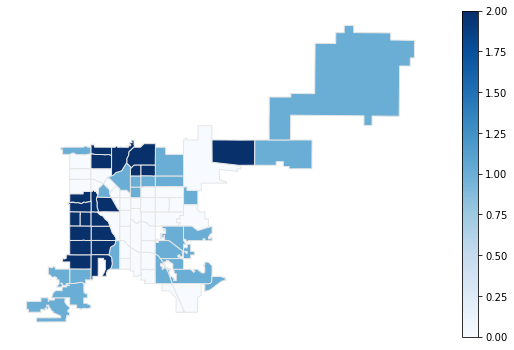

In [41]:
# Plot the clusters for 2015

fig, ax = plt.subplots(1, figsize=(10,6))
shape_2015.plot(column='CLUSTER', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

We notice that the coloring isn't quite what we would expect. Actually, this is a feature of the randomness used to implement K-Means. Now, we will adjust the coloring of the plots for 2010 and 2015 so that it matches the same scheme as for 2006.

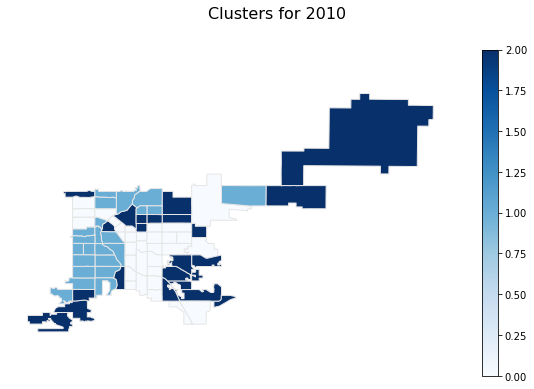

In [34]:
# Fix cluster colors for 2010
correct_2010_dict = {0:2, 2:0}
neighborhood_clustered_2010_fixed = neighborhood_clustered_2010.copy()
neighborhood_clustered_2010_fixed.loc[:,["CLUSTER"]] = neighborhood_clustered_2010_fixed["CLUSTER"].replace(correct_2010_dict)

# Plot with corrected colors

plot_neighborhoods_2010_fixed = neighborhoods_2010.merge(neighborhood_clustered_2010_fixed, how='inner', on="NBHD_NAME")

shape_2010_fixed = map_df.merge(plot_neighborhoods_2010_fixed, #map_df merge to df
 left_on=["NBHD_ID"], 
 right_on=["NBHD_ID"])

fig, ax = plt.subplots(1, figsize=(10,6))
shape_2010_fixed.plot(column='CLUSTER', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
fig.suptitle('Clusters for 2010', fontsize=16)
plt.savefig("2010 Clusters.png")

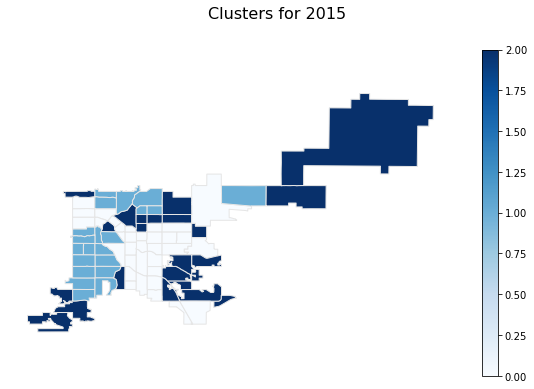

In [35]:
# Fix cluster colors for 2015
correct_2015_dict = {0:2, 2:1, 1:0}
neighborhood_clustered_2015_fixed = neighborhood_clustered_2015.copy()
neighborhood_clustered_2015_fixed.loc[:,["CLUSTER"]] = neighborhood_clustered_2015_fixed["CLUSTER"].replace(correct_2015_dict)

# Plot with corrected colors

plot_neighborhoods_2015_fixed = neighborhoods_2015.merge(neighborhood_clustered_2015_fixed, how='inner', on="NBHD_NAME")

shape_2015_fixed = map_df.merge(plot_neighborhoods_2015_fixed, #map_df merge to df
 left_on=["NBHD_ID"], 
 right_on=["NBHD_ID"])

fig, ax = plt.subplots(1, figsize=(10,6))
shape_2015_fixed.plot(column='CLUSTER', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
fig.suptitle('Clusters for 2015', fontsize=16)
plt.savefig("2015 Clusters.png")

In [3]:
from numpy import savetxt

In [33]:
clusters_06=np.array(plot_neighborhoods_2006)[:,-1]
clusters_10=np.array(plot_neighborhoods_2010)[:,-1]
clusters_15=np.array(plot_neighborhoods_2015)[:,-1]

In [39]:
len(clusters_06)

78

In [40]:
savetxt('2006_clsuters.csv',clusters_06,delimiter = ',')
savetxt('2010_clusters.csv',clusters_10,delimiter = ',')
savetxt('2015_clusters.csv',clusters_15,delimiter = ',')

In [57]:
cluster_06 = np.array(pd.read_csv('2006_clsuters.csv', header = None)).astype(int)

In [58]:
len(cluster_06)

78